In [10]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC 
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

# stops python from showing scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [11]:
X = pd.read_csv('/Users/stephen/Flatiron/Phase3/project_3/Data/training_set_features.csv', index_col='respondent_id')
y = pd.read_csv('/Users/stephen/Flatiron/Phase3/project_3/Data/training_set_labels.csv', index_col='respondent_id')
test_set = pd.read_csv('/Users/stephen/Flatiron/Phase3/project_3/Data/test_set_features.csv', index_col='respondent_id')

In [12]:
X.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

KeyError: 'h1n1_vaccine'

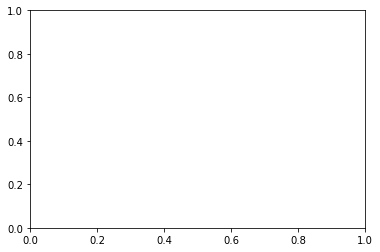

In [60]:
fig, ax = plt.subplots(sharex=True)

n_obs = y.shape[0]

(y['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax)
)
ax.set_ylabel("h1n1_vaccine")


In [15]:
y = pd.Series(y['h1n1_vaccine'])

In [16]:
y.shape

(26707,)

In [17]:
y.value_counts(normalize=True)

0   0.79
1   0.21
Name: h1n1_vaccine, dtype: float64

In [18]:
y

respondent_id
0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: h1n1_vaccine, Length: 26707, dtype: int64

In [19]:
X.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [20]:
X.shape

(26707, 35)

In [21]:
X.drop(columns=['hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'health_insurance', 'doctor_recc_seasonal'], inplace=True)

In [22]:
X.shape

(26707, 26)

In [23]:
X.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children
count,26615.00,26591.00,26636.00,26499.00,26688.00,26665.00,26620.00,26625.00,26579.00,24547.00,25736.00,25887.00,25903.00,26316.00,26319.00,26312.00,26458.00,26458.00
mean,1.62,1.26,0.05,0.73,0.07,0.83,0.36,0.34,0.68,0.22,0.28,0.08,0.11,3.85,2.34,2.36,0.89,0.53
std,0.91,0.62,0.22,0.45,0.25,0.38,0.48,0.47,0.47,0.41,0.45,0.28,0.32,1.01,1.29,1.36,0.75,0.93
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00
25%,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,1.00,0.00,0.00
50%,2.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,4.00,2.00,2.00,1.00,0.00
75%,2.00,2.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,5.00,4.00,4.00,1.00,1.00
max,3.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,5.00,5.00,3.00,3.00


In [24]:
X.isna().sum()

h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                    2042
employment_status              1463
household_adults                249
household_children              249
dtype: int64

In [27]:
y.shape

(26707,)

Baseline Model

In [28]:
num_cols = X.select_dtypes('number').columns

ord_cols = ['age_group', 'education',  'income_poverty', 'employment_status']

cat_cols = ['race', 'sex', 'marital_status', 'rent_or_own'] 

cat_cols

['race', 'sex', 'marital_status', 'rent_or_own']

In [29]:
num_cols

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [30]:
# drop Row with low correleation and lots of missing values

In [69]:
# code taken from https://www.drivendata.co/blog/predict-flu-vaccine-data-benchmark/

# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

cat_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ohe', OneHotEncoder(categories="auto", handle_unknown='ignore'))])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, num_cols), 
        ('cat', cat_transformer, cat_cols)], remainder = "drop")

#estimators = LogisticRegression(penalty="l2", C=1)

log_pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
        ("log", LogisticRegression(random_state=42, class_weight='balanced'))])

In [70]:
log_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'log', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__numeric', 'preprocessor__cat', 'preprocessor__numeric__memory', 'preprocessor__numeric__steps', 'preprocessor__numeric__verbose', 'preprocessor__numeric__standard_scaler', 'preprocessor__numeric__simple_imputer', 'preprocessor__numeric__standard_scaler__copy', 'preprocessor__numeric__standard_scaler__with_mean', 'preprocessor__numeric__standard_scaler__with_std', 'preprocessor__numeric__simple_imputer__add_indicator', 'preprocessor__numeric__simple_imputer__copy', 'preprocessor__numeric__simple_imputer__fill_value', 'preprocessor__numeric__simple_imputer__missing_values', 'preprocessor__numeric__simple_imputer__strategy', 'preprocessor__numeric__simple_imputer__verbose', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'prepro

In [32]:
from sklearn import set_config
set_config(display='diagram')

In [33]:
#pipe = Pipeline(steps=[ 
    #("col_transfer", preprocessor), 
    #('estimators', estimators)])


#X.shape

In [34]:
log_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', '...
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['race', 'sex',
                                                   'marital_status',
                                                   'rent_or_own'])])),
                ('log', LogisticRegression())])

In [35]:
X_train, X_true, y_train, y_true = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y, random_state=42)

In [88]:
# https://towardsdatascience.com/ml-pipelines-with-grid-search-in-scikit-learn-2539d6b53cfb

log_param = { 
        'preprocessor__numeric__simple_imputer__strategy': ['mean', 'median', 'most_frequent', 'constant'],
        'log__C': [0.005, 0.01, 0.012, 0.015],
        'log__max_iter': [100, 350, 400, 450, 500, 1000], 
        'log__multi_class': ['auto', 'ovr', 'multinomial'], 
        'log__penalty': ['l1', 'l2', 'elasticnet'], 
        'log__solver': ['lbfgs', 'sag', 'saga']
}


model = GridSearchCV(estimator=log_pipeline, param_grid=log_param, cv=3,n_jobs=-1, scoring='f1', verbose=3, refit=True, return_train_score=True)
model.fit(X_train, y_train)


Fitting 3 folds for each of 2592 candidates, totalling 7776 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standard_scaler',
                                                                                          StandardScaler()),
                                                                                         ('simple_imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'be...
             param_grid={'log__C': [0.005, 0.01, 0.012, 0.015],
                         'log__max_iter': [100, 350, 400, 450, 500, 1000],
                         'log__multi_class': ['auto', 'ovr', 'multinomial'],
                         'log__penalty': ['l1', 'l2', 'elasticnet'],
                         'log__solver': ['lbfgs', 'sag', 'saga'],
                         'preprocessor__numeric__simple_imputer__strategy': ['mean',
                                                                             'median',
                                                                             'most_frequent',
                                                                             'constant']},
             return_train_score=True, scoring='f1', verbose=3)

In [82]:
#best_mod = grid_search.fit(X_train, y_train)
model.best_params_

{'log__C': 0.005,
 'log__max_iter': 100,
 'log__multi_class': 'auto',
 'log__penalty': 'l1',
 'log__solver': 'saga',
 'preprocessor__numeric__simple_imputer__strategy': 'median'}

In [83]:
model.best_score_

0.5798811825229421

In [84]:
type(model)

sklearn.model_selection._search.GridSearchCV

In [85]:
model


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standard_scaler',
                                                                                          StandardScaler()),
                                                                                         ('simple_imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'be...
             param_grid={'log__C': [0.005, 0.01, 0.012, 0.015],
                         'log__max_iter': [100, 350, 400, 450, 500, 1000],
                         'log__multi_class': ['auto', 'ovr', 'multinomial'],
                         'log__penalty': ['l1', 'l2', 'elasticnet'],
                         'log__solver': ['lbfgs', 'sag', 'saga'],
                         'preprocessor__numeric__simple_imputer__strategy': ['mean',
                                                                             'median',
                                                                             'most_frequent',
                                                                             'constant']},
             return_train_score=True, scoring='f1', verbose=3)

In [86]:
from feature_importance import FeatureImportance
feature_importance = FeatureImportance(model)
feature_importance.plot()

AssertionError: Input isn't a Pipeline

In [ ]:

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')


plot_feature_importances(model)


print("train score: ",model.score(X_train,y_train))
print("train score: ",model.score(X_test,y_test))

log_pred = model.predict(X_test)

print("log accuracy: ", accuracy_score(y_test,log_pred))





In [ ]:
import missingno as msno
msno.heatmap(model.best_params_)


In [ ]:
def score_auc(model, X, y):
    y_score = model.predict_proba(X)  # You could also use the binary predict, but probabilities should give you a more realistic score.
    return roc_auc_score(y, y_score)

score_auc(model, X_train, y_train)


In [ ]:
plot_confusion_matrix(best_mod, X_test, y_test)

In [ ]:
grid_X = grid_search.fit(X_train)


In [ ]:
grid_search.predict(X_train)

In [ ]:
plot_confusion_matrix()

In [ ]:
print(grid_search.best_params_)

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_score_

In [ ]:
{
    'classifier': [KNeighborsClassifier()],
    'classifier_n_neighbors': [1, 2, 3, 5, 8, 10, 15], 
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__leaf_size': [10, 15, 20, 30, 50, 75]
    'classifier__weights': ['uniform', 'distance'], 
    'classifier_max_iter': [100, 100, 1000]
    },

{
    'classifier': [LinearSVC()],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__loss': ['hinge', 'squared_hinge'], 
    'classifier__C': [0.1, 1.0, 10.0, 50.0, 100.0],
    'classifier__random_state': 42, 
    'classifier_max_iter': [100, 100, 1000]
}

In [ ]:
y_pred

In [ ]:
roc_auc_score(y_true, y_pred)


In [ ]:
output = cross_validate(tree_pipeline, X_train, y_train, cv=3)
print(f"Average ROC-AUC: {output['test_score'].mean()} +/- {output['test_score'].std()}")

In [ ]:
output

#plot_roc_curve(clf, X_train, y_train)

In [ ]:

grid_search.score(X_test, y_test)

In [ ]:

grid_search.cv_results_

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearch#sklearn.model_selection.GridSearchCV

best_param_setting = grid_search.cv_results_['params'][grid_search.best_index_]
best_param_setting

In [ ]:
y_pred = clf.predict(X_train)

In [ ]:
#accuracy_score(y_train,y_pred)

print(grid_search)

In [ ]:
grid_search.best_score_

In [ ]:
clf.score(X_test, y_test)

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
y_pred.shape

In [ ]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

In [ ]:
coef = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(clf['classifier'].coef_))],axis=1)

In [ ]:
print(coef)

In [ ]:
plot_confusion_matrix(clf, y_test, y_pred)